# CRIAÇÃO DE DATAFRAME COM VALORES MÉDIOS RECEBIDOS POR CADA CIDADE POR ANO

In [ ]:
!pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", 3000)
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/My Drive/PIBITI - 2019/DadosTratamento/datasetCompleto2.csv')
df = df.drop(columns=['Unnamed: 0','LAT','LON'])
df.head()

,MES_REFERENCIA,MES_COMPETENCIA,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO,NIS_FAVORECIDO,NOME_FAVORECIDO,VALOR_PARCELA
0,201301,201202,DF,9701,BRASILIA,1.668612e+10,VALNI ESTEVES DE AZEVEDO,102.0
1,201301,201203,DF,9701,BRASILIA,1.668612e+10,VALNI ESTEVES DE AZEVEDO,102.0
2,201301,201204,DF,9701,BRASILIA,1.668612e+10,VALNI ESTEVES DE AZEVEDO,102.0
3,201301,201205,DF,9701,BRASILIA,1.668612e+10,VALNI ESTEVES DE AZEVEDO,102.0
4,201301,201206,DF,9701,BRASILIA,2.125903e+10,ANA PAULA PEREIRA DA SILVA,64.0


In [ ]:
# Remoção de algumas colunas que não será necessário para esta análise
df = df.drop(columns=['MES_COMPETENCIA','CODIGO_MUNICIPIO_SIAFI','NIS_FAVORECIDO','NOME_FAVORECIDO'])
df.head()

,MES_REFERENCIA,UF,NOME_MUNICIPIO,VALOR_PARCELA
0,201301,DF,BRASILIA,102.0
1,201301,DF,BRASILIA,102.0
2,201301,DF,BRASILIA,102.0
3,201301,DF,BRASILIA,102.0
4,201301,DF,BRASILIA,64.0


In [ ]:
# Cálculo da média por ano, direto nesse dataframe
df['ANO'] = 'NaN'
df_2013 = df.loc[df['MES_REFERENCIA'].between(201301, 201312)].replace('NaN', 2013)
df_2013 = df.loc[df['MES_REFERENCIA'].between(201301, 201312)].replace('NaN', 2013)
df_2014 = df.loc[df['MES_REFERENCIA'].between(201401, 201512)].replace('NaN', 2014)
df_2015 = df.loc[df['MES_REFERENCIA'].between(201501, 201512)].replace('NaN', 2015)
df_2016 = df.loc[df['MES_REFERENCIA'].between(201601, 201612)].replace('NaN', 2016)
df_2017 = df.loc[df['MES_REFERENCIA'].between(201701, 201712)].replace('NaN', 2017)
df_2018 = df.loc[df['MES_REFERENCIA'].between(201801, 201812)].replace('NaN', 2018)
df_2019 = df.loc[df['MES_REFERENCIA'].between(201901, 201912)].replace('NaN', 2019)

In [ ]:
resultado_teste = pd.concat([df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019])

In [ ]:
del resultado_teste['MES_REFERENCIA']
resultado_teste.head()

,UF,NOME_MUNICIPIO,VALOR_PARCELA,ANO
0,DF,BRASILIA,102.0,2013
1,DF,BRASILIA,102.0,2013
2,DF,BRASILIA,102.0,2013
3,DF,BRASILIA,102.0,2013
4,DF,BRASILIA,64.0,2013


In [ ]:
media_ano = resultado_teste.groupby(['ANO', 'NOME_MUNICIPIO'])['VALOR_PARCELA'].mean()

In [ ]:
media_ano.to_csv('media_ano.csv')

## Visualização da Média por ano - heatmaps

In [ ]:
media_ano = pd.read_csv('media_ano.csv')

In [ ]:
media_ano.head()

,ANO,NOME_MUNICIPIO,VALOR_PARCELA
0,2013,ACREUNA,148.672540
1,2013,AGUA FRIA DE GOIAS,138.652268
2,2013,AGUAS LINDAS DE GOIAS,157.329448
3,2013,ALEXANIA,146.140308
4,2013,ALTO PARAISO DE GOIAS,155.457581


In [ ]:
#media_ano.groupby(['ANO','NOME_MUNICIPIO']).head()
#media_ano.groupby('NOME_MUNICIPIO').head(2)
media_ano.loc[media_ano['NOME_MUNICIPIO'] == 'FORMOSA']

,ANO,NOME_MUNICIPIO,VALOR_PARCELA
18,2013,FORMOSA,139.805577
52,2014,FORMOSA,153.638682
86,2015,FORMOSA,156.615636
120,2016,FORMOSA,159.806835
154,2017,FORMOSA,167.166775
188,2018,FORMOSA,166.397753
222,2019,FORMOSA,165.167891


In [ ]:
#del media_ano['Unnamed: 0']
media_ano = pd.pivot_table(data=media_ano, index='NOME_MUNICIPIO', values='VALOR_PARCELA', columns='ANO')

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(media_ano, annot=True,  fmt=".1f")

Text(59.999999999999986, 0.5, 'Município')

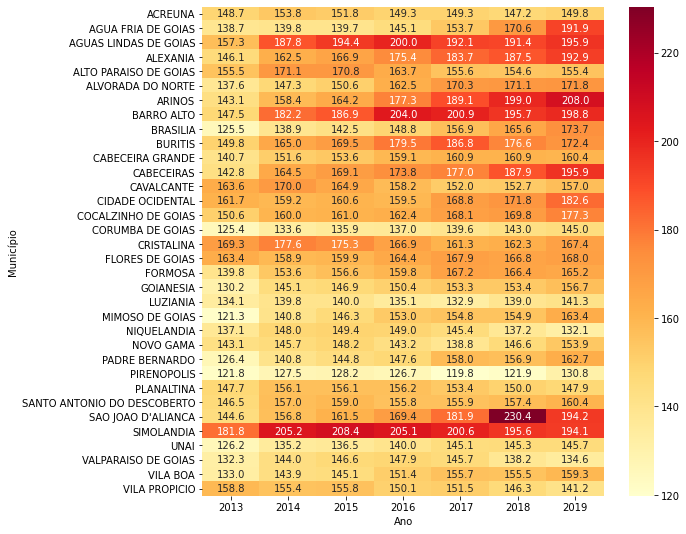

In [ ]:
plt.figure(figsize=(9,9))
p = sns.heatmap(media_ano, cmap='YlOrRd', annot=True, fmt=".1f")
plt.xlabel('Ano')
plt.ylabel('Município')

In [ ]:
p.get_figure().savefig('heatmap.png')

## Média por Mês

In [ ]:
# Verificando o valor médio da parcela por mês de referência de cada cidade
media = df.groupby(['MES_REFERENCIA', 'NOME_MUNICIPIO'])['VALOR_PARCELA'].mean()

In [ ]:
media

In [ ]:
media.shape

(238,)

In [ ]:
media.to_csv('dataset_media_mes_new.csv')

## Agora iremos trabalhar com o novo arquivo criado (dataset_media_ano_new.csv)

In [ ]:
new_df = pd.read_csv('/content/dataset_media_mes_new.csv')

In [ ]:
new_df.head()

,ANO,NOME_MUNICIPIO,VALOR_PARCELA
0,2013,ACREUNA,148.672540
1,2013,AGUA FRIA DE GOIAS,138.652268
2,2013,AGUAS LINDAS DE GOIAS,157.329448
3,2013,ALEXANIA,146.140308
4,2013,ALTO PARAISO DE GOIAS,155.457581


In [ ]:
new_df.shape

(238, 3)

In [ ]:
new_df['ANO'] = 'NaN'

In [ ]:
df_2013 = new_df.loc[new_df['MES_REFERENCIA'].between(201301, 201312)].replace('NaN', 2013)
df_2013 = new_df.loc[new_df['MES_REFERENCIA'].between(201301, 201312)].replace('NaN', 2013)
df_2014 = new_df.loc[new_df['MES_REFERENCIA'].between(201401, 201512)].replace('NaN', 2014)
df_2015 = new_df.loc[new_df['MES_REFERENCIA'].between(201501, 201512)].replace('NaN', 2015)
df_2016 = new_df.loc[new_df['MES_REFERENCIA'].between(201601, 201612)].replace('NaN', 2016)
df_2017 = new_df.loc[new_df['MES_REFERENCIA'].between(201701, 201712)].replace('NaN', 2017)
df_2018 = new_df.loc[new_df['MES_REFERENCIA'].between(201801, 201812)].replace('NaN', 2018)
df_2019 = new_df.loc[new_df['MES_REFERENCIA'].between(201901, 201912)].replace('NaN', 2019)

In [ ]:
result = pd.concat([df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019])

In [ ]:
del result['MES_REFERENCIA']
result.head()


In [ ]:
result.to_csv('dataset_media_ano_new.csv')

In [ ]:
result = pd.read_csv('/content/dataset_media_ano_new.csv')

In [ ]:
del result['Unnamed: 0']
result.head()

In [ ]:
result.shape

In [ ]:
result.loc[result['NOME_MUNICIPIO'] == 'FORMOSA']

In [ ]:
result.groupby(['NOME_MUNICIPIO','ANO'])['VALOR_PARCELA'].mean()